# House rent price prediction -- Task 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [5]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bedrooms
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2.0


In [6]:
# Extract number of bedrooms
df['bedrooms'] = df['size'].apply(lambda x: int(str(x).split(' ')[0]) if pd.notnull(x) and str(x).split(' ')[0].isdigit() else np.nan)

In [7]:
# Convert total_sqft to float
def convert_sqft(sqft):
    try:
        if '-' in str(sqft):
            tokens = sqft.split('-')
            return (float(tokens[0]) + float(tokens[1])) / 2
        return float(sqft)
    except:
        return np.nan

df['total_sqft'] = df['total_sqft'].apply(convert_sqft)

In [8]:
# Clean data
data = df[['total_sqft', 'bedrooms', 'bath', 'price']].dropna()
X = data[['total_sqft', 'bedrooms', 'bath']]
y = data['price']
print(X)
print(y)

       total_sqft  bedrooms  bath
0          1056.0       2.0   2.0
1          2600.0       4.0   5.0
2          1440.0       3.0   2.0
3          1521.0       3.0   3.0
4          1200.0       2.0   2.0
...           ...       ...   ...
13315      3453.0       5.0   4.0
13316      3600.0       4.0   5.0
13317      1141.0       2.0   2.0
13318      4689.0       4.0   4.0
13319       550.0       1.0   1.0

[13201 rows x 3 columns]
0         39.07
1        120.00
2         62.00
3         95.00
4         51.00
          ...  
13315    231.00
13316    400.00
13317     60.00
13318    488.00
13319     17.00
Name: price, Length: 13201, dtype: float64


In [9]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Model training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Predictions
y_pred = model.predict(X_test)
y_pred

array([186.28534998, 169.42452793,  66.09118481, ...,  74.3377551 ,
        60.79805084, 120.17404894])

In [12]:
# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Coefficients:")
print(f"total_sqft coef: {model.coef_[0]:.4f}")
print(f"bedrooms coef: {model.coef_[1]:.4f}")
print(f"bath coef: {model.coef_[2]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"\nMean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.4f}")

Model Coefficients:
total_sqft coef: 0.0525
bedrooms coef: -6.4201
bath coef: 39.5332
Intercept: -57.9539

Mean Squared Error: 11591.43
R^2 Score: 0.4384


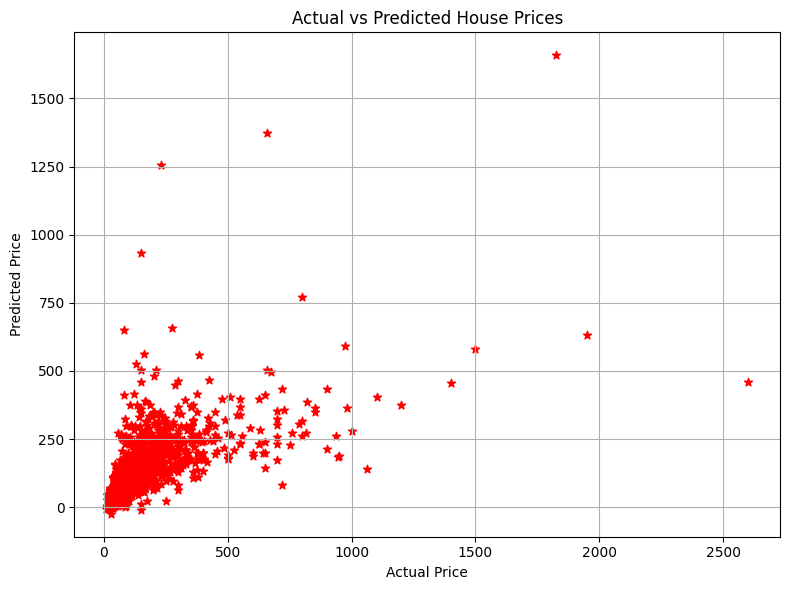

In [19]:
# Actual vs Predicted (Red)
plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(y_test, y_pred, color='red', marker='*')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()

# Save to correct path
plt.savefig('output.png')
# plt.close()
plt.show()

C:\Users\khann\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


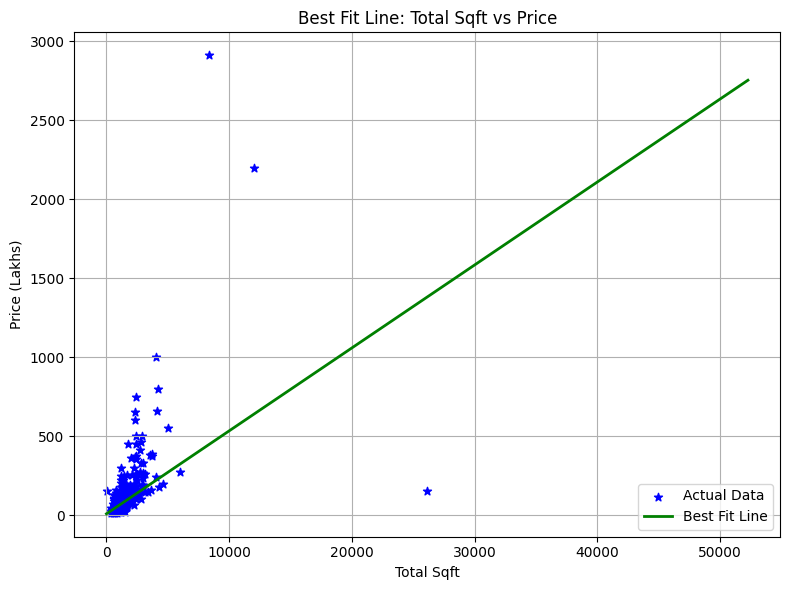

In [20]:
# Best-Fit Line 
avg_bed = int(X['bedrooms'].mean())
avg_bath = int(X['bath'].mean())

sqft_range = np.linspace(X['total_sqft'].min(), X['total_sqft'].max(), 100)
input_features = np.column_stack((sqft_range, [avg_bed]*100, [avg_bath]*100))
predicted_prices = model.predict(input_features)

plt.figure(figsize=(8, 6), dpi=100)
subset = data.sample(500)
# Blue stars for actual data
plt.scatter(subset['total_sqft'], subset['price'], label="Actual Data", color='blue', marker='*')
# Green line for best fit
plt.plot(sqft_range, predicted_prices, color='green', linewidth=2, label="Best Fit Line")
plt.xlabel("Total Sqft")
plt.ylabel("Price (Lakhs)")
plt.title("Best Fit Line: Total Sqft vs Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('best_fit_line.png')
plt.show()